In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#Reading the data into the dataframe
df_layoffs = pd.read_csv("layoffs.csv")

### Cleaning and Preparing the Data

In [3]:
# Convert the 'date' column to datetime
df_layoffs['date'] = pd.to_datetime(df_layoffs['date'])

# Extract the year and add it as a new column
df_layoffs['year'] = df_layoffs['date'].dt.year

In [4]:
#Checking out the data
df_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year
0,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18,Unknown,India,180.0,2024
1,Stability AI,London,AI,20.0,NaN,2024-04-18,Unknown,United Kingdom,174.0,2024
2,ConnectWise,Tampa Bay,Other,NaN,NaN,2024-04-17,Acquired,United States,1.0,2024
3,Google,SF Bay Area,Consumer,NaN,NaN,2024-04-17,Post-IPO,United States,26.0,2024
4,Rivian,Detroit,Transportation,NaN,0.01,2024-04-17,Post-IPO,United States,10700.0,2024


In [5]:
#Checking out the data
df_layoffs.tail()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year
3563,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1,2020
3564,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0,2020
3565,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0,2020
3566,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0,2020
3567,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0,2020


In [6]:
df_layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3568 non-null   object        
 1   location             3567 non-null   object        
 2   industry             3567 non-null   object        
 3   total_laid_off       2338 non-null   float64       
 4   percentage_laid_off  2295 non-null   float64       
 5   date                 3568 non-null   datetime64[ns]
 6   stage                3561 non-null   object        
 7   country              3568 non-null   object        
 8   funds_raised         3186 non-null   float64       
 9   year                 3568 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 264.9+ KB


In [7]:
df_layoffs.describe()

,total_laid_off,percentage_laid_off,date,funds_raised,year
count,2338.000000,2295.000000,3568,3186.000000,3568.000000
mean,256.677502,0.279594,2022-08-15 16:05:47.085201664,787.537349,2022.174047
min,3.000000,0.000000,2020-03-11 00:00:00,0.000000,2020.000000
25%,40.000000,0.100000,2022-06-10 00:00:00,51.000000,2022.000000
50%,80.000000,0.170000,2022-12-02 00:00:00,165.000000,2022.000000
75%,184.000000,0.300000,2023-05-26 00:00:00,463.750000,2023.000000
max,14000.000000,1.000000,2024-04-18 00:00:00,121900.000000,2024.000000
std,831.752545,0.286055,NaN,4785.029585,1.179552


### Handling duplicates

In [8]:
# Get duplicates
df_layoffs[df_layoffs.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year
2090,Beyond Meat,Los Angeles,Food,200.0,0.19,2022-10-14,Post-IPO,United States,122.0,2022
2701,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0,2022


In [9]:
# Removing Duplicates since we are sure they are repeated data
df_layoffs = df_layoffs.drop_duplicates()

### Handling Missing Values

In [10]:
# Number of rows in data frame
len(df_layoffs)

3566

In [11]:
 # Checking for total null values
df_layoffs.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1230
percentage_laid_off    1273
date                      0
stage                     7
country                   0
funds_raised            382
year                      0
dtype: int64

Most of the missing values were recorded in the following fields:

* total_laid_off
* percentage_laid_off
* funds_raised

#### Dropping row with missing values

In [12]:
#Drops rows where the 'total_laid_off' column value is null
df_layoffs = df_layoffs.dropna(subset=['total_laid_off', 'stage'])

In [13]:
df_layoffs.isnull().sum()

company                  0
location                 0
industry                 1
total_laid_off           0
percentage_laid_off    684
date                     0
stage                    0
country                  0
funds_raised           223
year                     0
dtype: int64

#### Imputing values for missing data

In [14]:
#Isolating 'industry' and 'stage' columns with null values
df_layoffs[df_layoffs['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year
502,Appsmith,SF Bay Area,NaN,35.0,0.25,2023-09-22,Series B,United States,51.0,2023


In [15]:
# manually imputing data we got online
df_layoffs.loc[502, 'industry'] = 'Data'

In [16]:
#Checking for the remaining null values
df_layoffs.isna().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off    684
date                     0
stage                    0
country                  0
funds_raised           223
year                     0
dtype: int64

### Column Analysis

In [17]:
df_layoffs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 0 to 3567
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2333 non-null   object        
 1   location             2333 non-null   object        
 2   industry             2333 non-null   object        
 3   total_laid_off       2333 non-null   float64       
 4   percentage_laid_off  1649 non-null   float64       
 5   date                 2333 non-null   datetime64[ns]
 6   stage                2333 non-null   object        
 7   country              2333 non-null   object        
 8   funds_raised         2110 non-null   float64       
 9   year                 2333 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 255.9+ KB


# Exploring the Data

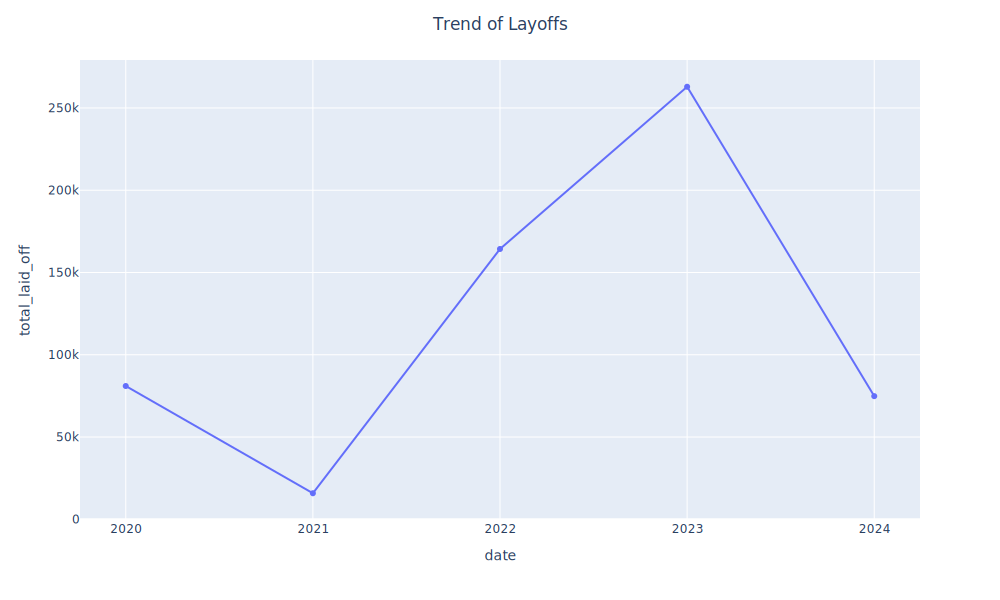

In [18]:
# Group by year and sum the total_laid_off for each year
a = df_layoffs.groupby(df_layoffs['date'].dt.year)['total_laid_off'].sum().reset_index()

# Create a line chart
fig = px.line(a, y='total_laid_off', x='date', width=1000, height=600)

# Update x-axis scale to display whole numbers
fig.update_xaxes(tickmode='linear', dtick=1)

# Add markers to the line
fig.update_traces(mode='lines+markers')

# Center the title
fig.update_layout(title={'text': 'Trend of Layoffs', 'x':0.5})

# Show the plot
fig.show("svg")

* *The number of layoffs varied greatly over the five-year period, with a dramatic increase from 2021 to 2023 followed by a sharp decrease in 2024.*
* *The highest number of layoffs occurred in 2023, surpassing 250,000.*
* *Lowest Point in 2021: The lowest point was in 2021, with layoffs barely exceeding 100,000.*

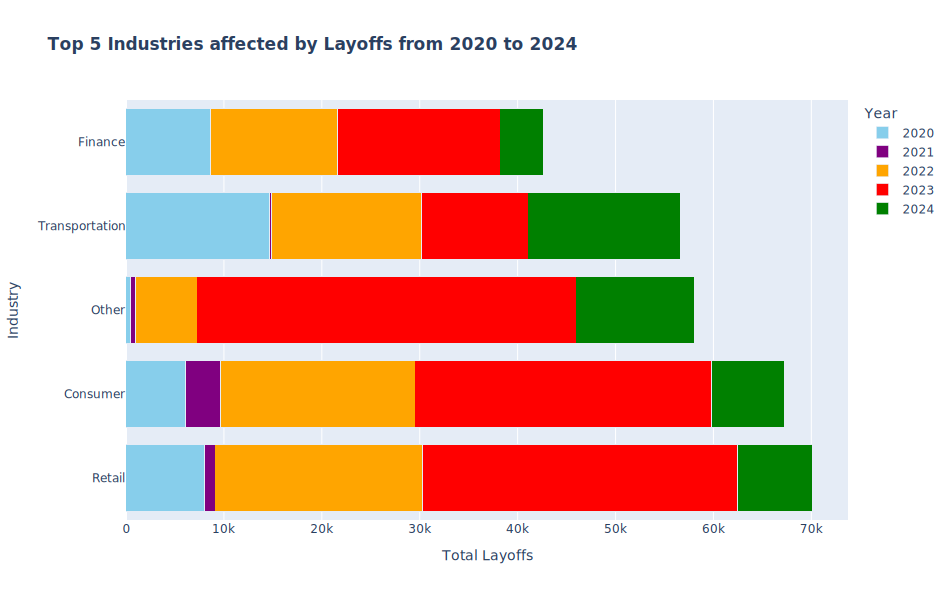

In [19]:
# Group by 'industry' and 'year', and sum up the total layoffs
industry_year_counts = df_layoffs.groupby(['industry', 'year'])['total_laid_off'].sum().unstack().fillna(0)

# Get the top 5 industries with the most layoffs
top_industries = industry_year_counts.sum(axis=1).sort_values(ascending=False).head().index

# Select only the top 5 industries
industry_year_counts = industry_year_counts.loc[top_industries]

# Reset index to make 'industry' a column again
industry_year_counts = industry_year_counts.reset_index()

# Melt the DataFrame to long format
industry_year_counts_melted = industry_year_counts.melt(id_vars='industry', var_name='year', value_name='total_laid_off')

# Create the bar chart using Plotly Express
fig = px.bar(industry_year_counts_melted, 
             x='total_laid_off', 
             y='industry', 
             color='year', 
             orientation='h', 
             barmode='stack',
             title='<b>Top 5 Industries affected by Layoffs from 2020 to 2024</sup>',
             labels={'total_laid_off': 'Total Layoffs', 'industry': 'Industry', 'year': 'Year'},
             width=950, height=600,
             color_discrete_sequence=['skyblue', 'purple', 'orange', 'red', 'green'])

fig.show("svg")

* *The retail industry experienced the highest number of layoffs, exceeding 70,000.*
* *The consumer industry follows closely with almost 70,000 layoffs.*
* *Transportation and Finance: The transportation, finance and other industries both faced a considerable number of layoffs, with each exceeding 40,000.*

### A closer look at the Retail Industry:

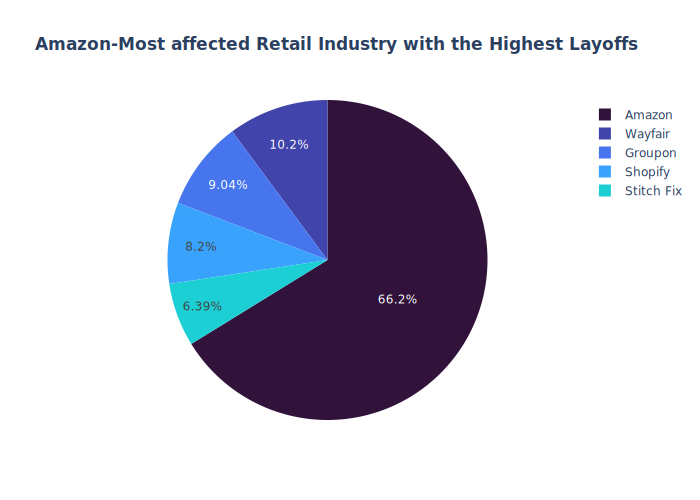

In [20]:
# Filter the DataFrame for Retail
us_df = df_layoffs[df_layoffs['industry'] == 'Retail']

# Group by 'location', sum up the total layoffs, sort in descending order, and select top 5
top_5_locations = us_df.groupby('company')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False).head()

# Create a pie chart using Plotly Express
fig = px.pie(top_5_locations,
             names='company',
             values='total_laid_off',
             color_discrete_sequence=px.colors.sequential.Turbo,
             title='<b>Amazon-Most affected Retail Industry with the Highest Layoffs</b><br><sup>Year: 2020 - 2024</sup>')

# Show the plot
fig.show("svg")

* *Amazon accounts for 66.2% of all layoffs within this group, indicating a significant workforce reduction likely stemming from adjustments made in response to the pandemic's impact on consumer behavior and operational challenges.*

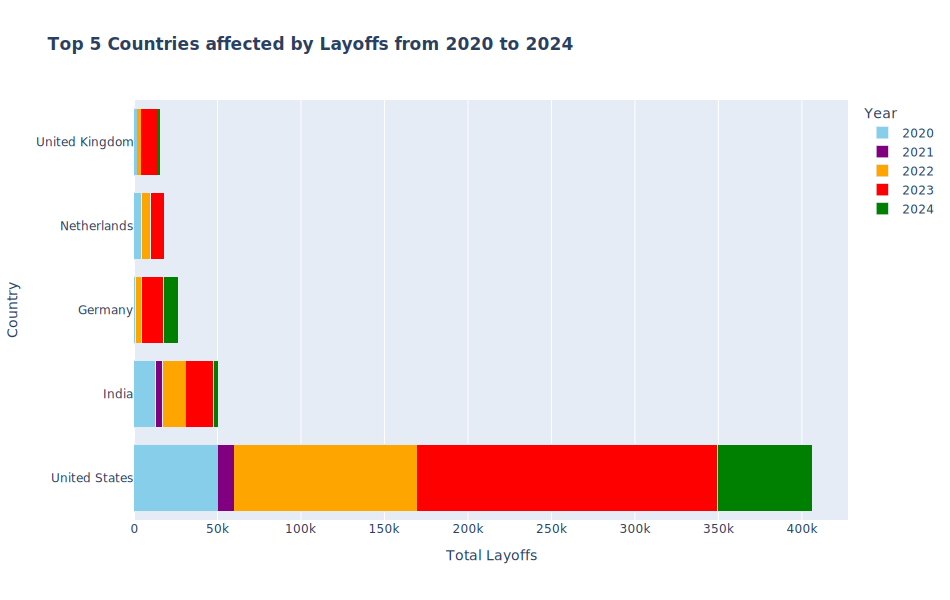

In [21]:
# Group by 'country' and 'year', and sum up the total layoffs
country_year_counts = df_layoffs.groupby(['country', 'year'])['total_laid_off'].sum().unstack().fillna(0)

# Get the top 5 countries with the most layoffs
top_countries = country_year_counts.sum(axis=1).sort_values(ascending=False).head().index

# Select only the top 5 countries
country_year_counts = country_year_counts.loc[top_countries]

# Reset index to make 'country' and 'year' columns again
country_year_counts = country_year_counts.reset_index()

# Melt the DataFrame to long format
country_year_counts_melted = country_year_counts.melt(id_vars='country', var_name='year', value_name='total_laid_off')

# Create the bar chart using Plotly Express
fig = px.bar(country_year_counts_melted, 
             x='total_laid_off', 
             y='country', 
             color='year',
             orientation='h', 
             barmode='stack',
             title='<b>Top 5 Countries affected by Layoffs from 2020 to 2024</sup>',
             labels={'total_laid_off': 'Total Layoffs', 'country': 'Country', 'year': 'Year'},
              width=950, height=600,
             color_discrete_sequence=['skyblue', 'purple', 'orange', 'red', 'green'])

fig.show("svg")

* *The United States has experienced the highest number of layoffs throughout the entire period, with a significant peak in 2023.*
* *India saw a substantial rise in layoffs between 2021 and 2023, but it decreased again in 2024.*
* *2023 was the year with the most layoffs across all countries, followed by a general decline in 2024.*
* *Germany and the Netherlands consistently had lower numbers of layoffs compared to other countries.*
* *The United Kingdom experienced fluctuations in layoffs, with a peak in 2021 followed by decreases in subsequent years.*
* ***Economic Factors:*** *The high number of layoffs, particularly in the US, might be attributed to economic downturns or shifts in global markets.*
* ***Pandemic Impact:*** *The surge in layoffs in 2023 could be a delayed effect of the COVID-19 pandemic, causing companies to restructure and downsize.*

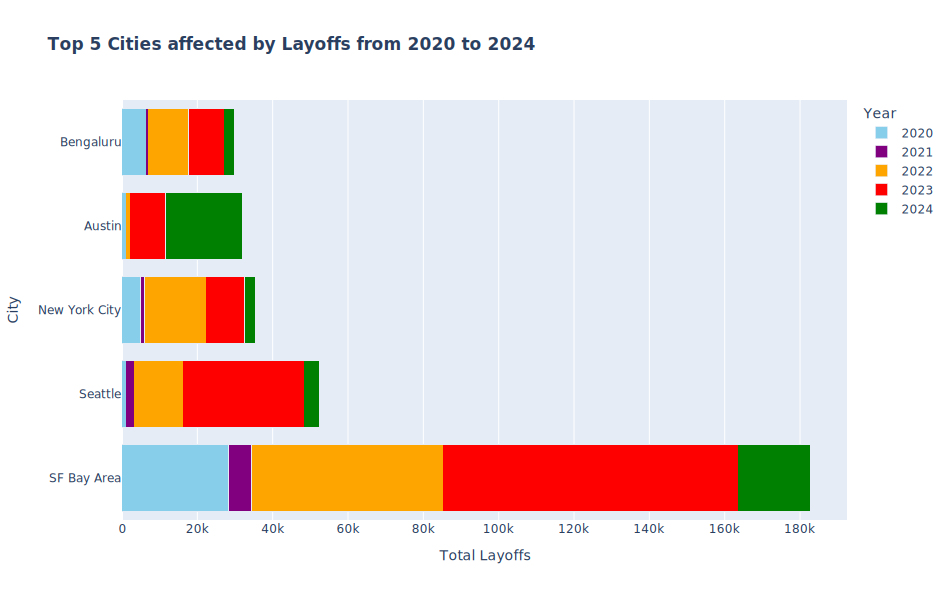

In [22]:
# Group by 'location' and 'year', and sum up the total layoffs
city_year_counts = df_layoffs.groupby(['location', 'year'])['total_laid_off'].sum().unstack().fillna(0)

# Get the top 5 cities with the most layoffs
top_cities = city_year_counts.sum(axis=1).sort_values(ascending=False).head().index

# Select only the top 5 cities
city_year_counts = city_year_counts.loc[top_cities]

# Reset index to make 'location' and 'year' columns again
city_year_counts = city_year_counts.reset_index()

# Melt the DataFrame to long format
city_year_counts_melted = city_year_counts.melt(id_vars='location', var_name='year', value_name='total_laid_off')

# Create the bar chart using Plotly Express
fig = px.bar(city_year_counts_melted, 
             x='total_laid_off', 
             y='location', 
             color='year', 
             orientation='h', 
             barmode='stack',
             title='<b>Top 5 Cities affected by Layoffs from 2020 to 2024</sup>',
             labels={'total_laid_off': 'Total Layoffs', 'location': 'City', 'year': 'Year'},
              width=950, height=600,
             color_discrete_sequence=['skyblue', 'purple', 'orange', 'red', 'green'])

fig.show("svg")

* *The SF Bay Area experienced the highest number of layoffs throughout the entire period, with a significant peak in 2023.*
* *Bengaluru and New York City had a comparable number of layoffs, with a peak in 2023 as well.*
* *Austin and Seattle experienced fewer layoffs compared to the other cities, with more consistent numbers across the years.*
* *Most cities experienced the most layoffs in 2023, followed by a general decline in 2024.*
* ***Tech Industry Influence:*** *The high number of layoffs in the SF Bay Area could be attributed to the concentration of tech companies in the region, which might have been affected by economic downturns or industry-specific trends.*
* ***Pandemic Impact:*** *The surge in layoffs in 2023 across multiple cities could be a delayed effect of the COVID-19 pandemic, causing companies to restructure and downsize.*

### Delving into the Layoff Trends: A Chronological Analysis (2020-2024)
This chronological approach will allow us to discern trends and changes in the data, providing valuable insights into the evolving employment landscape in the region.

***Top 5 companies that laid off their employees  in 2020***

In [23]:
layoffs_2020 = df_layoffs[df_layoffs['year'] == 2020].sort_values(by='total_laid_off', ascending =  False).head()
layoffs_2020.drop(['date', 'stage', 'funds_raised', 'year'], axis=1)

,company,location,industry,total_laid_off,percentage_laid_off,country
2991,Booking.com,Amsterdam,Travel,4375.0,0.25,Netherlands
3141,Uber,SF Bay Area,Transportation,3700.0,0.14,United States
3095,Uber,SF Bay Area,Transportation,3000.0,0.13,United States
3296,Groupon,Chicago,Retail,2800.0,0.44,United States
3148,Airbnb,SF Bay Area,Travel,1900.0,0.25,United States


***Top 5 companies that laid off their employees  in 2021***

In [24]:
layoffs_2021 = df_layoffs[df_layoffs['year'] == 2021].sort_values(by='total_laid_off', ascending = False).head()
layoffs_2021.drop(['date', 'stage', 'funds_raised', 'year'], axis=1)

,company,location,industry,total_laid_off,percentage_laid_off,country
2905,Katerra,SF Bay Area,Construction,2434.0,1.00,United States
2893,Zillow,Seattle,Real Estate,2000.0,0.25,United States
2927,Instacart,SF Bay Area,Food,1877.0,NaN,United States
2932,WhiteHat Jr,Mumbai,Education,1800.0,NaN,India
2903,Bytedance,Shanghai,Consumer,1800.0,NaN,China


***Top 5 companies that laid off their employees  in 2022***

In [25]:
layoffs_2022 = df_layoffs[df_layoffs['year'] == 2022].sort_values(by = 'total_laid_off', ascending = False).head()
layoffs_2022.drop(['date', 'stage', 'funds_raised', 'year'], axis=1)

,company,location,industry,total_laid_off,percentage_laid_off,country
1953,Meta,SF Bay Area,Consumer,11000.0,0.13,United States
1885,Amazon,Seattle,Retail,10000.0,0.03,United States
1886,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,United States
2055,Philips,Amsterdam,Healthcare,4000.0,0.05,Netherlands
1985,Twitter,SF Bay Area,Consumer,3700.0,0.50,United States


***Top 5 companies that laid off their employees  in 2023***

In [26]:
layoffs_2023 = df_layoffs[df_layoffs['year'] == 2023].sort_values(by = 'total_laid_off', ascending = False).head()
layoffs_2023.drop(['date', 'stage', 'funds_raised', 'year'], axis=1)

,company,location,industry,total_laid_off,percentage_laid_off,country
1469,Google,SF Bay Area,Consumer,12000.0,0.06,United States
1502,Microsoft,Seattle,Other,10000.0,0.05,United States
1144,Meta,SF Bay Area,Consumer,10000.0,NaN,United States
1127,Amazon,Seattle,Retail,9000.0,NaN,United States
1214,Ericsson,Stockholm,Other,8500.0,0.08,Sweden


***Top 5 companies that laid off their employees  in 2024***

In [27]:
layoffs_2024 = df_layoffs[df_layoffs['year'] == 2024].sort_values(by = 'total_laid_off', ascending = False).head()
layoffs_2024.drop(['date', 'stage', 'funds_raised', 'year'], axis=1)

,company,location,industry,total_laid_off,percentage_laid_off,country
7,Tesla,Austin,Transportation,14000.0,0.10,United States
190,SAP,Walldorf,Other,8000.0,0.07,Germany
42,Dell,Austin,Hardware,6000.0,0.05,United States
109,Cisco,SF Bay Area,Infrastructure,4250.0,0.05,United States
271,Xerox,Norwalk,Hardware,3000.0,0.15,United States


**Countries Most Affected by Layoffs**
* Since the emergence of COVID-19, a compelling trend has consistently emerged: nearly 4 out of 5 of the top companies with the most layoffs each year are located in the United States. 
* This observation underscores the profound impact of the pandemic on the U.S. job market.

### A closer look at The United States of America:

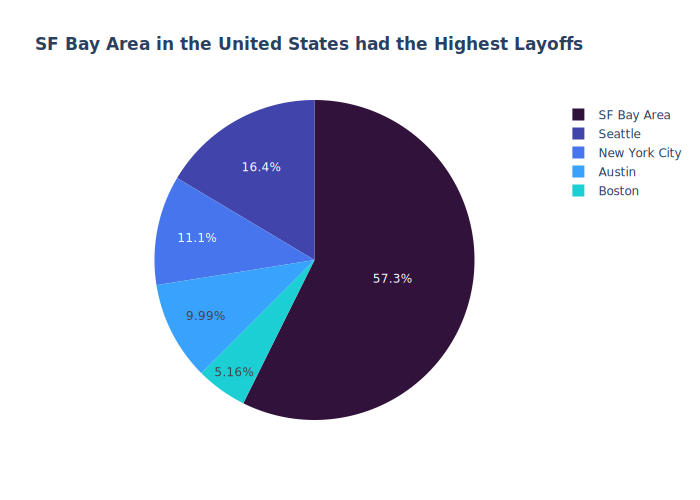

In [28]:
# Filter the DataFrame for United States
us_df = df_layoffs[df_layoffs['country'] == 'United States']

# Group by 'location', sum up the total layoffs, sort in descending order, and select top 5
top_5_locations = us_df.groupby('location')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False).head()

# Create a pie chart using Plotly Express
fig = px.pie(top_5_locations,
             names='location',
             values='total_laid_off',
             color_discrete_sequence=px.colors.sequential.Turbo,
             title='<b>SF Bay Area in the United States had the Highest Layoffs</b><br><sup>Year: 2020 - 2024</sup>')

# Show the plot
fig.show("svg")

* *From the pie chart, the San Francisco Bay Area emerges as the region with the highest number of layoffs.*
* *This observation underscores the complex dynamics at play within this iconic region, known for its technological innovation and economic diversity.*
* One of the major factors that have affected affected companies in this location is the after effects of the COVID-19 pandemic. Industries that depend on in-person interactions, such as transportation and retail were masively impacted during this period.

### Analyzing Correlations and Outliers

In [29]:
#Dropping all NAs in the dataset
df_layoffs_clean = df_layoffs.dropna()

df_layoffs_cleaned = df_layoffs_clean.drop(columns = ['country', 'stage', 'date', 'industry', 'location', 'company'])

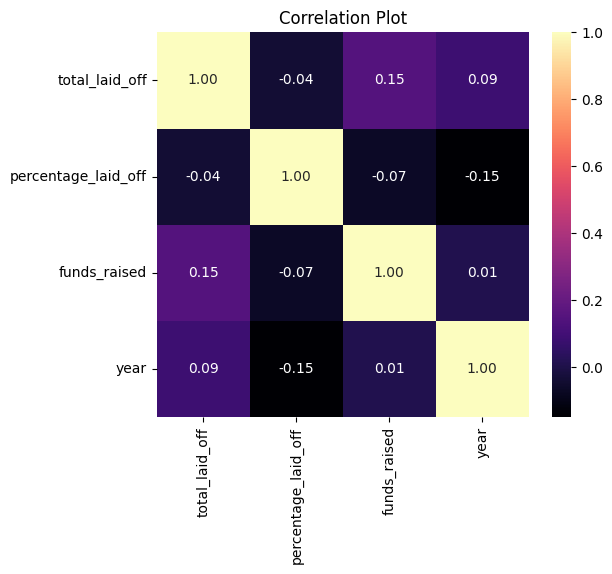

In [30]:
# Calculate correlation matrix
correlation_matrix = df_layoffs_cleaned.corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

* *The correlation plot illustrates the relationships between four variables: total_laid_off, percentage_laid_off, funds_raised, and year.*
* *Overall, the correlation plot reveals that there are no strong linear relationships between the variables considered.*

### Checking for Outliers

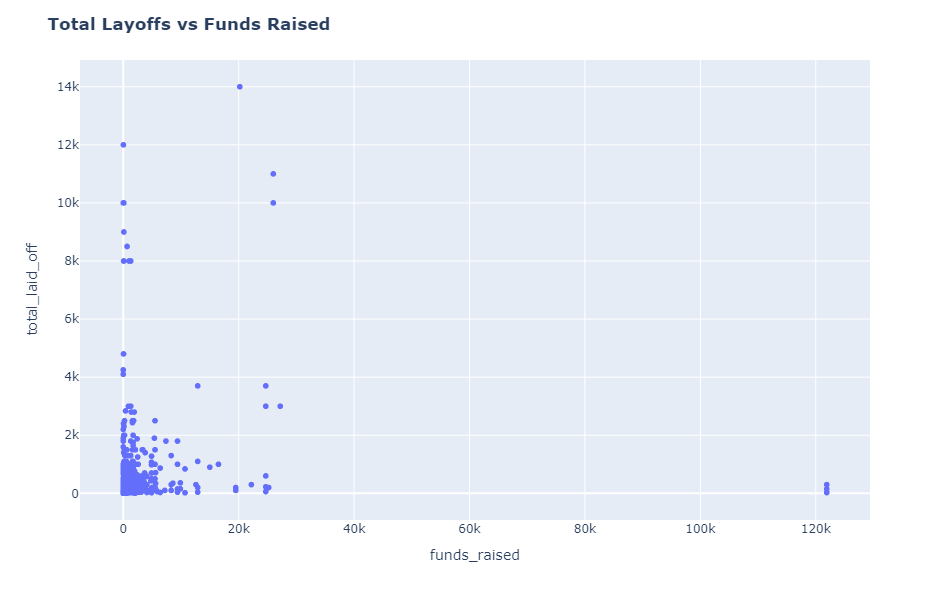

In [31]:
# Create a scatter plot
fig = px.scatter(df_layoffs, y='total_laid_off', x='funds_raised',  width=950, height=600,)

# Set the title of the plot
fig.update_layout(title_text='<b>Total Layoffs vs Funds Raised</sup>')

# Show the plot as PNG
fig.show("png")

* ***No Strong Correlation:*** *There doesn't appear to be a strong correlation between the total number of layoffs and the amount of funds raised. This suggests that companies that raise more funds are not necessarily more likely to lay off employees.*
* ***Concentration of Layoffs at Lower Funding Levels:*** *Most layoffs occur in companies that have raised less than USD 20 billion in funds. This could imply that companies with less funding may be more vulnerable to financial difficulties and therefore more prone to layoffs. This observed correlation underlines the pivotal role of financial resources and the ability to secure funding in an organization's capacity to retain its workforce amid economic and industry challenges. Companies endowed with substantial financial backing appear to possess a greater ability to weather turbulent periods without resorting to significant layoffs.*
* ***Outliers:*** *There are a few outliers in the plot. One company (Netflix) with over USD 120 billion in funds raised has laid off a small number of employees, while most companies with around USD 20 billion in funds raised has laid off a large number of employees. These outliers suggest that other factors besides funding may influence the number of layoffs.*

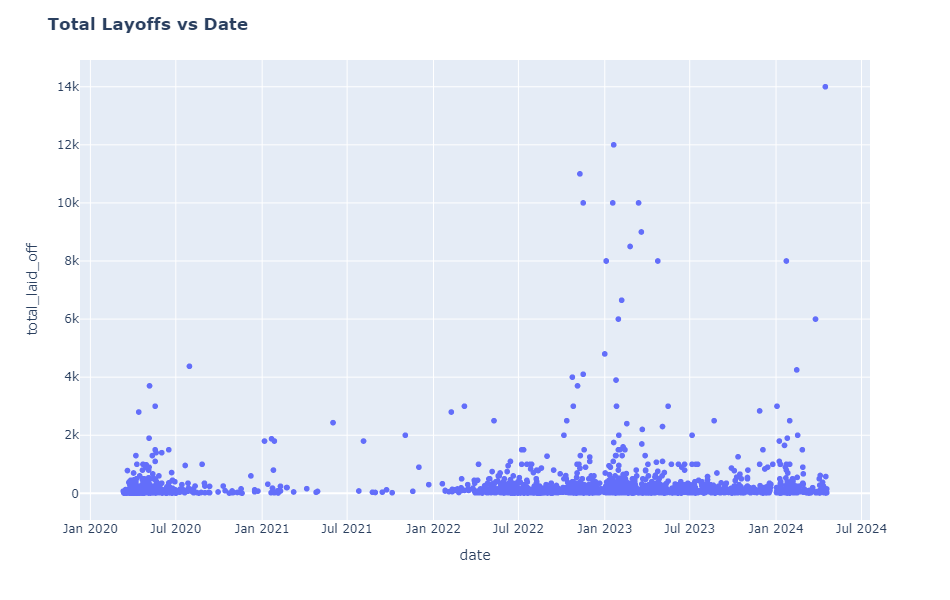

In [32]:
# Create a scatter plot
fig = px.scatter(df_layoffs,y='total_laid_off',x='date',  width=950, height=600,)

# Set the title of the plot
fig.update_layout(title_text='<b>Total Layoffs vs Date</sup>')

# Show the plot as PNG
fig.show("png")

* ***Overall Trend:*** *The number of layoffs was relatively low and stable from early 2020 to late 2022. There was a significant surge in layoffs starting around January 2023, peaking around mid-2023, and then gradually declining throughout the rest of 2023 and into 2024.*
* ***Peak Period:*** *The period from January 2023 to mid-2023 saw an unprecedented spike in layoffs, with the total number exceeding 10,000 on several occasions.*
* ***Recent Decline:*** *Although layoffs remain higher than pre-2023 levels, there's a clear downward trend from mid-2023 onwards.*
* ***Variability:*** *While there's an overall trend, there's also considerable variability in the number of layoffs from one point to the next, suggesting that layoff events are often sporadic and influenced by various factors.*
* ***Economic Factors:*** *The surge in layoffs starting in 2023 could be attributed to various economic factors, such as rising interest rates, inflation, or a potential recession.*
* ***Industry-Specific Trends:*** *Certain industries might have been more prone to layoffs than others due to technological advancements, changes in consumer behavior, or other disruptive forces.*
* ***Global Events:*** *Global events like the ongoing conflict in Ukraine or lingering effects of the COVID-19 pandemic could have contributed to economic instability and subsequent layoffs.*

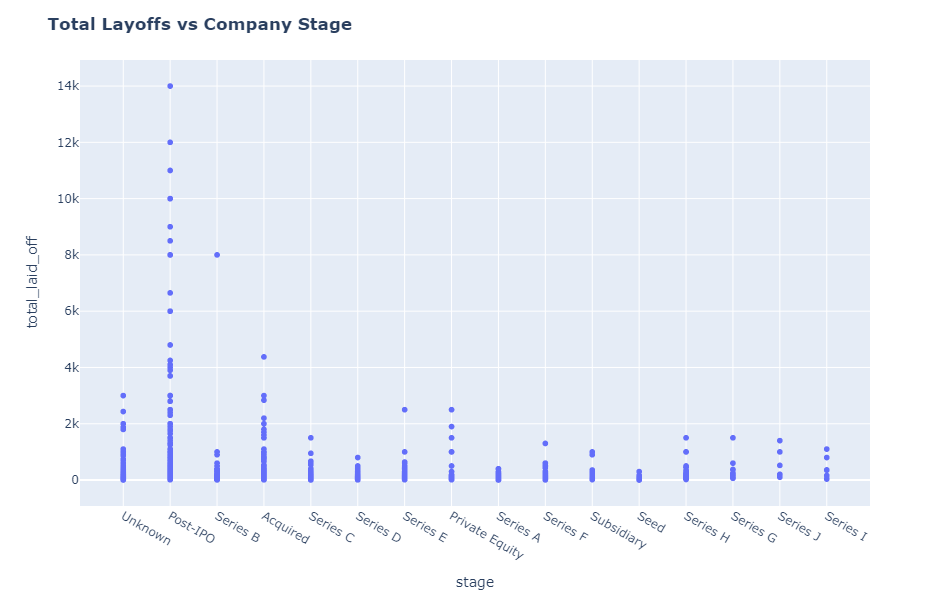

In [33]:
# Create a scatter plot
fig = px.scatter(df_layoffs,y='total_laid_off',x='stage', width=950, height=600,)

# Set the title of the plot
fig.update_layout(title_text='<b>Total Layoffs vs Company Stage</sup>')

# Show the plot as PNG
fig.show("png")

* ***Unequal Distribution:*** *Layoffs are not evenly distributed across funding stages. Some stages experience significantly more layoffs than others.*
* ***Post-IPO:*** *The highest number of layoffs occur in companies that are Post-IPO stage. This suggests these stage was particularly vulnerable to workforce reductions, hence companies in this stage face greater financial pressure to meet investor expectations, leading to layoffs.*
* ***Early-Stage Stability:*** *Companies in earlier funding stages, such as Seed and Series A, generally experience fewer layoffs. This could indicate that these companies are more resilient or have smaller workforces.*
* *Early-stage companies typically have smaller teams, potentially explaining the lower layoff numbers in these stages.*

### Conclusion

Key Takeaways:

* *The number of layoffs varied greatly over the five-year period, with a dramatic increase from 2021 to 2023 followed by a sharp decrease in 2024.*

* *The United States, India, Germany, Netherlands, and the United Kingdom emerged as focal points of significant layoffs, signaling widespread economic challenges across regions.*

* *The Top 5 locations within the United States bearing the brunt of layoffs. This granular examination illuminated regional disparities in workforce stability, highlighting distinct challenges faced by different geographical areas.*

* *A compelling correlation emerged, indicating that companies with lower funding levels experienced more significant layoffs. This underscores the critical role of financial resilience in shielding organizations from workforce disruptions during tumultuous economic periods.*

* *Pinpointing the Top 5 companies in the Retail Industry with the highest layoffs provided insights into sectoral dynamics and potential intervention points. Understanding the landscape of layoffs within key industry players offers strategic opportunities for targeted support and intervention.*    


**Further Analysis**

* *This analysis represents a fraction of the broader landscape of workforce dynamics. Several areas warrant further exploration to deepen our understanding and inform strategic interventions:*

* *Areas for further studies include:*
    
   * *Investigating other industries beyond Retail to uncover unique challenges and opportunities for workforce stability.*
   * *Analyzing why early stage companies experienced relatively lower layoffs*
   * *Conducting comparative studies across different regions and countries to identify global patterns and variations in layoff trends.*